<a href="https://colab.research.google.com/github/Adebesindedayo/Women-s-Mentorship-1-Hack-for-Safety-by-Agence-Fran-aise-de-D-veloppement/blob/main/Women's_Mentorship_1_Hack_for_Safety_by_Agence_Fran%C3%A7aise_de_D%C3%A9veloppement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
pip install catboost

     |████████████████████████████████| 69.2MB 44kB/s 


In [1]:
!pip install rgf_python


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from lightgbm import LGBMClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from rgf.sklearn import RGFClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold,train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
sns.set()
pd.set_option('display.max_columns', None)


In [9]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# GETTING ALL THE DATA SET

In [10]:
train= pd.read_csv("/content/gdrive/My Drive/FIRST_HACKATON/Train.csv")
train.head()


,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,Other relative (e.g. in-laws or aunt/uncle) of...,Living together like husband and wife,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,Father/mother/stepfather/stepmother of person 01,Widowed,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0


In [11]:
test= pd.read_csv("/content/gdrive/My Drive/FIRST_HACKATON/Test.csv")
test.head()


,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work
0,ID_00241643,Female,23,Coloured,Dwelling/house or brick/concrete block structu...,Formal,Northern Cape,NC - Non Metro,36410104,South Africa,Head/acting head,Single and have never been married/never lived...,Afrikaans,Afrikaans,Grade 10/Standard 8/Form 3,Yes,No,No,Not applicable,Permanent
1,ID_00312043,Female,64,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,97410477,South Africa,Head/acting head,Widowed,Afrikaans,Afrikaans,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable
2,ID_00345323,Female,18,Black African,Unspecified,Unspecified,Eastern Cape,EC - Buffalo City,26011572,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,IsiXhosa,IsiXhosa,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable
3,ID_00369643,Female,19,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87710674,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Xitsonga,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable
4,ID_00381163,Female,24,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87411106,South Africa,Head/acting head,Single and have never been married/never lived...,SiSwati,SiSwati,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable


 ## BASIC EXPLORATORY DATA ANALYSIS


In [12]:
train.describe(include='all')

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
count,7736,7736,7736.000000,7736,7736,7736,7736,7736,7.736000e+03,7736,7736,7736,7736,7736,7736,7736,7736,7736,7736,7736,7736.000000
unique,7736,1,NaN,4,13,3,9,17,NaN,3,10,8,15,14,33,4,4,4,5,8,NaN
top,ID_28292843,Female,NaN,Black African,Dwelling/house or brick/concrete block structu...,Formal,Gauteng,KZN - Non Metro,NaN,South Africa,Head/acting head,Single and have never been married/never lived...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,NaN
freq,1,7736,NaN,6312,5213,6841,1775,872,NaN,7346,3679,3246,1677,1651,1918,5062,7263,7692,4470,4473,NaN
mean,NaN,NaN,42.193252,NaN,NaN,NaN,NaN,NaN,6.078730e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078206
std,NaN,NaN,17.269251,NaN,NaN,NaN,NaN,NaN,2.548540e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.268513
min,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,1.601007e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,3.681004e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,5.991442e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,7.991039e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [13]:
train.info()
#all except the target variable is a categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7736 entries, 0 to 7735
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 7736 non-null   object
 1   gender             7736 non-null   object
 2   age                7736 non-null   int64 
 3   race               7736 non-null   object
 4   dwelling           7736 non-null   object
 5   dwelling_type      7736 non-null   object
 6   province_code      7736 non-null   object
 7   metro_code         7736 non-null   object
 8   psu                7736 non-null   int64 
 9   nationality        7736 non-null   object
 10  RTH                7736 non-null   object
 11  marital_st         7736 non-null   object
 12  Lang_inside        7736 non-null   object
 13  Lang_outside       7736 non-null   object
 14  Education          7736 non-null   object
 15  lw_work            7736 non-null   object
 16  lw_business        7736 non-null   object


In [14]:
train.columns

Index(['ID', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work',
       'target'],
      dtype='object')

In [15]:
train.shape

(7736, 21)

**## HANDLING OF CATEGORICAL VARIABLE OF THE TRAIN AND TEST DATA SET USING LABEL ENCODING**

In [16]:
le = LabelEncoder()

In [17]:
train.gender = le.fit_transform(train.gender).astype(np.uint8)
test.gender = le.fit_transform(test.gender).astype(np.uint8)

train.race = le.fit_transform(train.race).astype(np.uint8)
test.race = le.fit_transform(test.race).astype(np.uint8)

train.dwelling = le.fit_transform(train.dwelling).astype(np.uint8)
test.dwelling = le.fit_transform(test.dwelling).astype(np.uint8)

train.dwelling_type = le.fit_transform(train.dwelling_type).astype(np.uint8)
test.dwelling_type = le.fit_transform(test.dwelling_type).astype(np.uint8)

train.province_code = le.fit_transform(train.province_code).astype(np.uint8)
test.province_code = le.fit_transform(test.province_code).astype(np.uint8)

train.metro_code = le.fit_transform(train.metro_code).astype(np.uint8)
test.metro_code = le.fit_transform(test.metro_code).astype(np.uint8)

train.nationality= le.fit_transform(train.nationality	).astype(np.uint8)
test.nationality = le.fit_transform(test.nationality	).astype(np.uint8)

train.RTH= le.fit_transform(train.RTH).astype(np.uint8)
test.RTH= le.fit_transform(test.RTH).astype(np.uint8)

train.marital_st= le.fit_transform(train.marital_st).astype(np.uint8)
test.marital_st= le.fit_transform(test.marital_st).astype(np.uint8)

train.Lang_inside	= le.fit_transform(train.Lang_inside	).astype(np.uint8)
test.Lang_inside= le.fit_transform(test.Lang_inside	).astype(np.uint8)

train.Lang_outside= le.fit_transform(train.Lang_outside	).astype(np.uint8)
test.Lang_outside	= le.fit_transform(test.Lang_outside).astype(np.uint8)

train.Education= le.fit_transform(train.Education).astype(np.uint8)
test.Education= le.fit_transform(test.Education).astype(np.uint8)

train.nature_of_work= le.fit_transform(train.nature_of_work	).astype(np.uint8)
test.nature_of_work= le.fit_transform(test.nature_of_work	).astype(np.uint8)

train.lw_business= le.fit_transform(train.lw_business).astype(np.uint8)
test.lw_business= le.fit_transform(test.lw_business	).astype(np.uint8)

train.lw_work= le.fit_transform(train.lw_work).astype(np.uint8)
test.lw_work= le.fit_transform(test.lw_work).astype(np.uint8)

train.help_on_household	= le.fit_transform(train.help_on_household).astype(np.uint8)
test.help_on_household= le.fit_transform(test.help_on_household).astype(np.uint8)

train.job_or_business= le.fit_transform(train.job_or_business).astype(np.uint8)
test.job_or_business= le.fit_transform(test.job_or_business).astype(np.uint8)

**##  SETTING THE FEATURES AND THE LABEL AS X AND Y RESPECTIVELY**

In [18]:
X = train.drop(['ID', 'target'], axis =1)
y = train.target

**DATA VISUALIZATION OF THE TARGET VARIABLE**

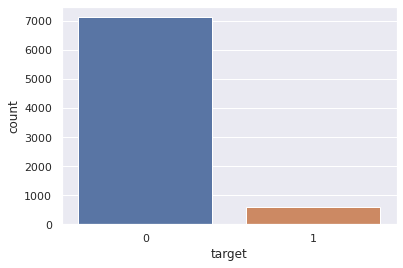

In [19]:
sns.countplot(train["target"])

**THERE IS CLASS IMBALANCE WITH THE TARGET VARIABLE**

In [20]:
X[y == 1]

,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work
12,0,52,0,2,0,1,3,49910888,1,4,0,8,8,4,1,1,1,1,3
21,0,52,0,2,0,2,6,79912690,1,5,2,7,0,9,3,1,1,2,4
26,0,19,1,2,0,8,15,19916403,1,7,4,0,0,11,1,1,1,1,3
27,0,46,0,3,0,2,7,79714053,1,4,4,3,3,9,3,1,1,2,4
30,0,20,0,2,0,8,15,19912297,1,8,4,3,3,18,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,0,23,0,2,0,4,11,98410192,1,8,4,7,7,11,1,1,1,1,3
7693,0,65,1,2,0,8,16,17710223,1,4,7,0,0,14,1,1,1,1,3
7695,0,59,3,2,0,6,14,67710157,1,5,2,0,0,11,1,1,1,1,3
7704,0,61,3,2,0,1,4,47310098,1,5,2,0,1,11,1,1,1,1,3


**## DEALING WITH CLASS IMBALANCE USING RESAMPLING**

In [24]:
print('Number of class 1 samples before:',X[y == 1].shape[0])

Number of class 1 samples before: 605


In [27]:
print('Number of class 0 samples before:',X[y == 0].shape[0])

Number of class 0 samples before: 7131


In [29]:
X_upsampled, y_upsampled = resample(X[y == 1],y[y == 1],replace=True,n_samples=X[y == 0].shape[0],random_state=123)
print('Number of class 1 samples after:',X_upsampled.shape[0])

Number of class 1 samples after: 7131


In [30]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

In [32]:
# for seed value 45

preds, scores = [], []
 
seed = 64
 
Vc = VotingClassifier(estimators=[
('cat',  CatBoostClassifier(verbose=False, thread_count=-1, random_state=seed)), 
('rgf', RGFClassifier()), ("rgf1", RGFClassifier(algorithm="RGF_Sib")), ('cat1', CatBoostClassifier(bagging_temperature = 0.8609895558337871, border_count=116, depth=5, iterations=270, l2_leaf_reg=3, 
                         learning_rate=0.07085617391173239, random_strength=0.08820672130534879, random_state=seed, scale_pos_weight=0.390675124341283, verbose=False, thread_count=-1)),
                           
('gr' ,GradientBoostingClassifier()),
('rg',RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=seed)), ('rg1', RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=seed))], 
voting="soft", weights=[3, 1.5,1.5,1,1,1,1])
 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) 

X = train.drop(['ID', 'target'], axis =1)
y = train.target
test_x=test.drop('ID', axis =1)
 
i = 5
for train_index, test_index in skf.split(X, y):
  print("Number of splits left {0} to train.".format(i))
  x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  pipe = Pipeline([("SC", MinMaxScaler()), ("clf", Vc)])
  pipe.fit(x_train, y_train)
  score = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])
  scores.append(score) 
  pred = pipe.predict_proba(test_x)[:, 1]
  preds.append(pred)
  print(score)
  i -= 1
 
np.mean(scores)

Number of splits left 5 to train.
0.5963444086015278
Number of splits left 4 to train.
0.674625896862286
Number of splits left 3 to train.
0.6367577341694388
Number of splits left 2 to train.
0.6561815399951317
Number of splits left 1 to train.
0.6727249545048857


0.6473269068266541

In [33]:
ss = pd.read_csv("/content/gdrive/My Drive/FIRST_HACKATON/SampleSubmission.csv")
p = np.mean(preds, axis=0)
ss["target"] = p
ss.to_csv("zindi13.csv", index=False)